## Import Initial Packages

In [1]:
#Import necessary libraries
#Analysis & Math calculation
import pandas as pd
import numpy as np

#Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Import dataset
train_data = pd.read_csv('train.csv',parse_dates = True,encoding='cp1252')
test_data = pd.read_csv('test.csv',parse_dates = True,encoding='cp1252')
meta_data = pd.read_csv('metaData.csv')

## Dataset Summary

In [3]:
#Exploring Train & Test data
print(train_data.shape)
print(test_data.shape)

(58857, 20)
(19609, 19)


In [4]:
train_data.head()

,x1,x2,x3,x4,x5,y,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19
0,1,03/04/16 11:54,Subaru_G3X_Justy_1.3,private,offer,3850,Small Car,2004,manual,94,Other,50000.0,7,petrol,subaru,No,03/04/16 0:00,0,34474,07/04/16 13:15
1,2,08/03/16 19:54,Volkswagen_Passat_Variant_2.0_TDI_DPF_Comfortline,private,offer,5999,Combi,2007,manual,140,passat,150000.0,5,diesel,volkswagen,No,08/03/16 0:00,0,50765,11/03/16 17:15
2,3,26/03/16 17:38,Mercedes_Benz_C_220_CDI_Automatik_Elegance_AHK...,private,offer,5990,limousine,2007,automatic,150,c_klasse,150000.0,2,diesel,mercedes_benz,No,26/03/16 0:00,0,90475,26/03/16 17:38
3,4,11/03/16 13:42,Alfa_Romeo_147_1.9_JTD_16V_M_Jet,private,offer,4000,limousine,2005,manual,150,147,150000.0,9,diesel,alfa_romeo,No,11/03/16 0:00,0,40699,12/03/16 2:45
4,5,17/03/16 17:49,Audi_A4,private,offer,12950,Combi,2005,manual,200,a4,125000.0,3,petrol,audi,No,17/03/16 0:00,0,84347,07/04/16 4:17


In [5]:
test_data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19
0,60001,14/03/16 12:52,"Jeep_Grand_Cherokee_""Overland""",private,offer,suv,2004,automatic,163,grand,125000.0,8,diesel,jeep,NaN,14/03/16 0:00,0,90480,05/04/16 12:47
1,60002,21/03/16 21:37,VW_PASSAT_1.9_TDI_131_PS_LEDER,private,offer,Combi,2004,manual,131,passat,150000.0,2,NaN,volkswagen,No,21/03/16 0:00,0,90762,23/03/16 2:50
2,60003,21/03/16 12:57,Nissan_Navara_2.5DPF_SE4x4_Klima_Sitzheizg_Blu...,private,offer,suv,2011,manual,190,navara,70000.0,3,diesel,nissan,No,21/03/16 0:00,0,4177,06/04/16 7:45
3,60004,23/03/16 15:48,Ford_C_MAX_2.0_TDCi_DPF_Titanium,private,offer,bus,2007,manual,136,c_max,150000.0,6,diesel,ford,No,23/03/16 0:00,0,88361,05/04/16 18:45
4,60005,18/03/16 21:44,BMW_530d_touring_Vollausstattung_NAVI,private,offer,Combi,2002,automatic,193,5er,150000.0,9,diesel,bmw,Yes,18/03/16 0:00,0,73765,18/03/16 21:44


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58857 entries, 0 to 58856
Data columns (total 20 columns):
x1     58857 non-null int64
x2     58857 non-null object
x3     58857 non-null object
x4     58857 non-null object
x5     58857 non-null object
y      58857 non-null int64
x6     57013 non-null object
x7     58857 non-null int64
x8     57138 non-null object
x9     58857 non-null int64
x10    58857 non-null object
x11    58857 non-null float64
x12    58857 non-null int64
x13    56772 non-null object
x14    58857 non-null object
x15    52008 non-null object
x16    58857 non-null object
x17    58857 non-null int64
x18    58857 non-null int64
x19    58857 non-null object
dtypes: float64(1), int64(7), object(12)
memory usage: 9.0+ MB


In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19609 entries, 0 to 19608
Data columns (total 19 columns):
x1     19609 non-null int64
x2     19609 non-null object
x3     19609 non-null object
x4     19609 non-null object
x5     19609 non-null object
x6     18973 non-null object
x7     19609 non-null int64
x8     19104 non-null object
x9     19609 non-null int64
x10    19609 non-null object
x11    19609 non-null float64
x12    19609 non-null int64
x13    18855 non-null object
x14    19609 non-null object
x15    17360 non-null object
x16    19609 non-null object
x17    19609 non-null int64
x18    19609 non-null int64
x19    19609 non-null object
dtypes: float64(1), int64(6), object(12)
memory usage: 2.8+ MB


In [8]:
train_data.describe()

,x1,y,x7,x9,x11,x12,x17,x18
count,58857.000000,58857.000000,58857.000000,58857.000000,58857.000000,58857.000000,58857.0,58857.000000
mean,29429.000000,7638.980971,2006.286457,129.956454,120146.626569,6.178093,0.0,51941.873881
std,16990.696734,6710.787043,4.016998,178.359488,41188.999160,3.523184,0.0,25639.658736
min,1.000000,1001.000000,2000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,14715.000000,2850.000000,2003.000000,86.000000,90000.000000,3.000000,0.0,31675.000000
50%,29429.000000,5400.000000,2006.000000,121.000000,150000.000000,6.000000,0.0,51067.000000
75%,44143.000000,9999.000000,2009.000000,163.000000,150000.000000,9.000000,0.0,72760.000000
max,58857.000000,39800.000000,2016.000000,19211.000000,150000.000000,12.000000,0.0,99998.000000


In [9]:
test_data.describe()

,x1,x7,x9,x11,x12,x17,x18
count,19609.00000,19609.000000,19609.000000,19609.000000,19609.000000,19609.0,19609.000000
mean,69805.00000,2006.280891,129.708756,120023.713601,6.173135,0.0,51824.653475
std,5660.77505,4.053163,103.603591,41414.709841,3.521508,0.0,25610.174885
min,60001.00000,2000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,64903.00000,2003.000000,87.000000,90000.000000,3.000000,0.0,31655.000000
50%,69805.00000,2006.000000,122.000000,150000.000000,6.000000,0.0,51065.000000
75%,74707.00000,2009.000000,163.000000,150000.000000,9.000000,0.0,72461.000000
max,79609.00000,2016.000000,10218.000000,150000.000000,12.000000,0.0,99996.000000


## Exploratory Data Analysis

In [10]:
#creating a label for each dataset
train_data['Type'] = 'Train'
test_data['Type'] = 'Test'

In [11]:
# Create a fulldata with both train and test datasets
fulldata = pd.concat([train_data,test_data],axis = 0,sort = False)

In [12]:
fulldata.dtypes

x1        int64
x2       object
x3       object
x4       object
x5       object
y       float64
x6       object
x7        int64
x8       object
x9        int64
x10      object
x11     float64
x12       int64
x13      object
x14      object
x15      object
x16      object
x17       int64
x18       int64
x19      object
Type     object
dtype: object

### Multivariate Analysis

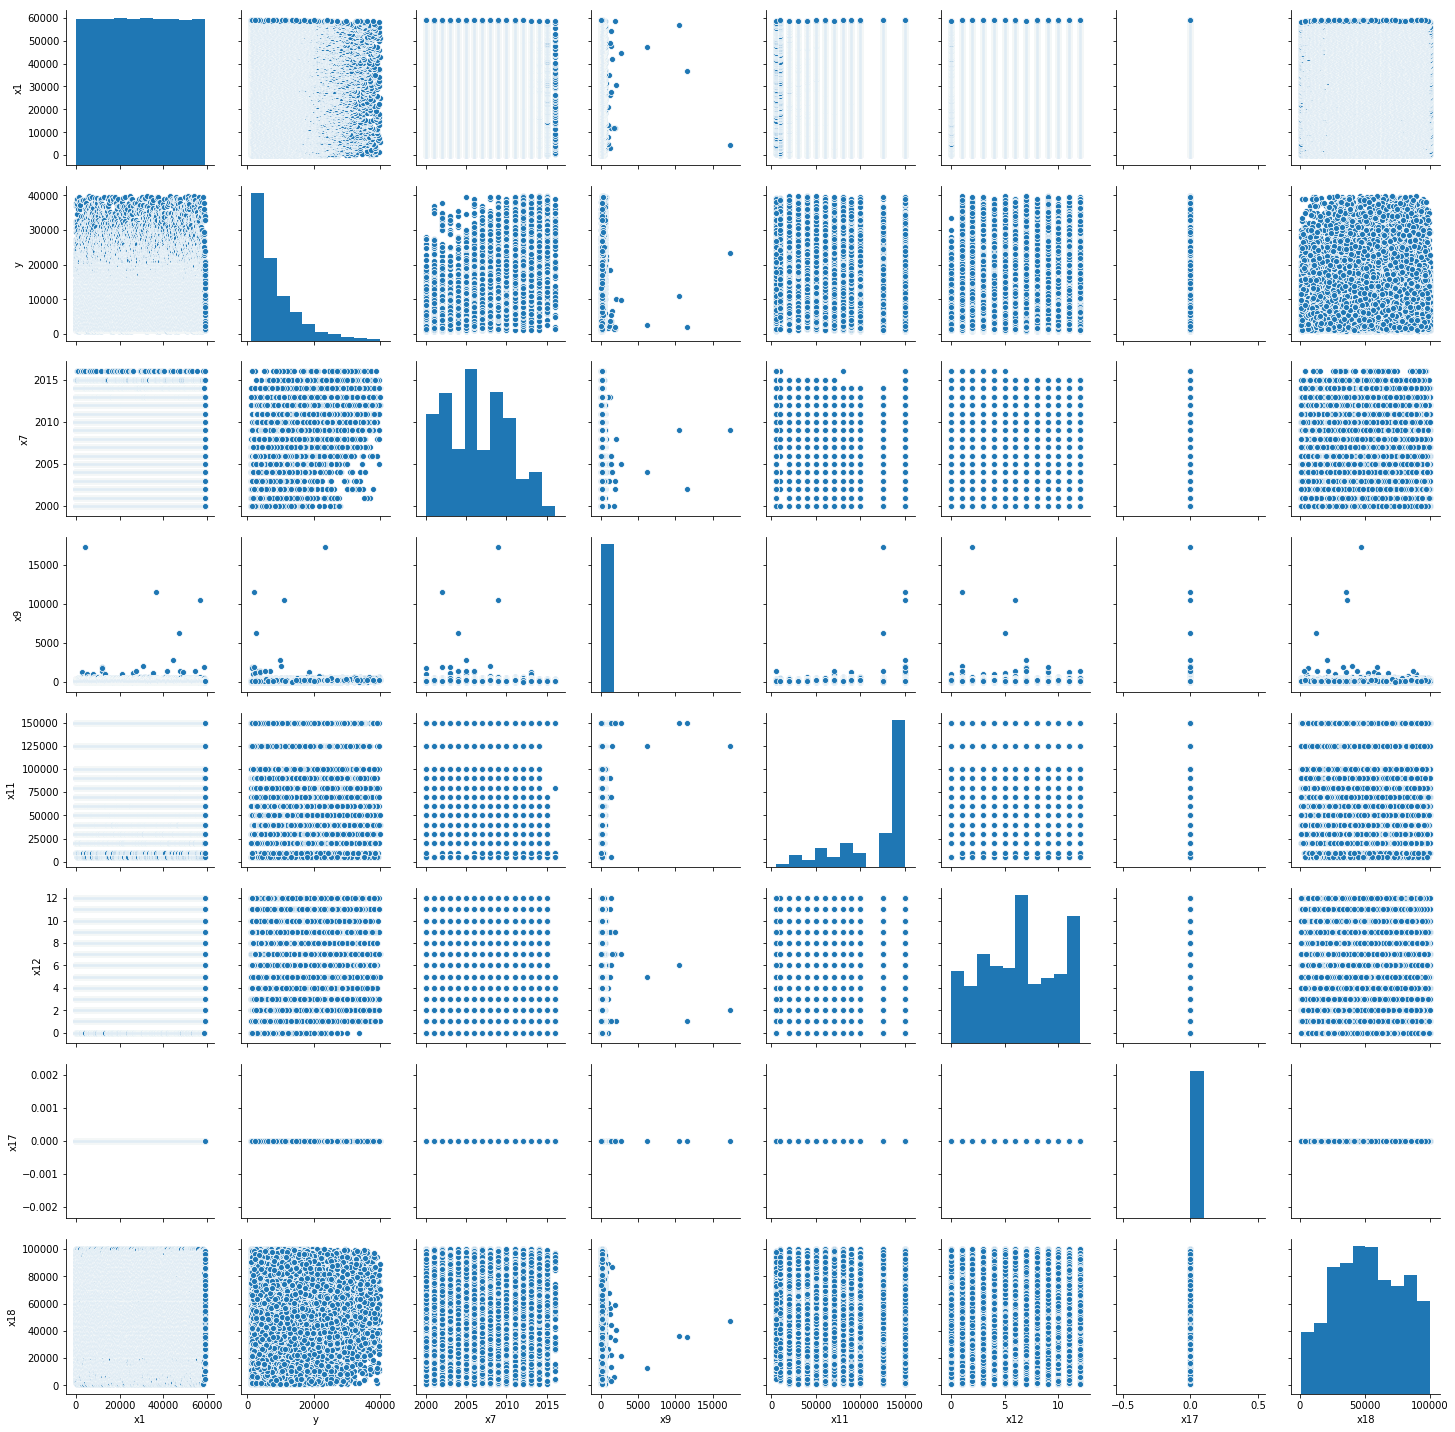

In [13]:
sns.pairplot(train_data.dropna())

Text(0,0.5,'Vehicle Price')

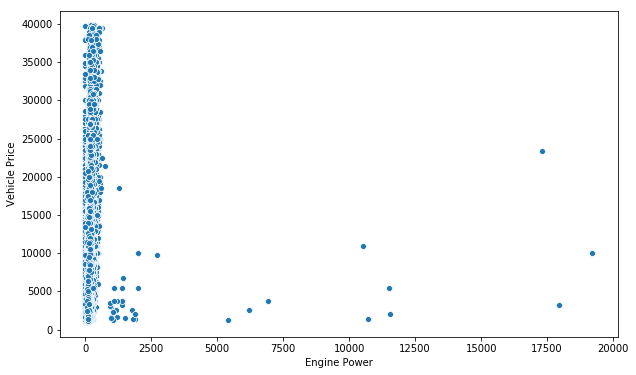

In [14]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'x9', y = 'y', data = train_data)
plt.xlabel('Engine Power')
plt.ylabel('Vehicle Price')
#plt.legend(loc = 'center',bbox_to_anchor=(1.2, 0.5))

## Preprocessing

In [15]:
ID_col = ['x1']
target_col = ['y']
cat_cols = ['x4','x5','x6','x8','x12','x13','x14','x15']
num_cols = ['x7','x9','x11','x18']
string_cols = ['x3','x10']
date_cols = ['x2','x16','x19']
other_cols = ['Type']
bool_cols = ['x17']

### Find duplication

In [16]:
# To find any duplicate records
fulldata[fulldata.duplicated() == True].count()

x1      0
x2      0
x3      0
x4      0
x5      0
y       0
x6      0
x7      0
x8      0
x9      0
x10     0
x11     0
x12     0
x13     0
x14     0
x15     0
x16     0
x17     0
x18     0
x19     0
Type    0
dtype: int64

### Find Missing Values

In [17]:
#lets add numweical and categorical values together to find the missing values
num_cat_cols = num_cols + cat_cols

#find the missing values in percentage
total = fulldata[num_cat_cols].isnull().sum().sort_values(ascending = False)
percent = (fulldata[num_cat_cols].isnull().sum()/fulldata[num_cat_cols].isnull().count() * 100).sort_values(ascending = False)
missing_data = pd.concat([total,percent],axis = 1,keys = ['Total','Percent'])
missing_data

,Total,Percent
x15,9098,11.594831
x13,2839,3.618128
x6,2480,3.160605
x8,2224,2.834349
x14,0,0.000000
x12,0,0.000000
x5,0,0.000000
x4,0,0.000000
x18,0,0.000000
x11,0,0.000000


All the mising values are from the categorical columns

In [18]:
fulldata[['x15','x13','x6','x8']].head(5).T

,0,1,2,3,4
x15,No,No,No,No,No
x13,petrol,diesel,diesel,diesel,petrol
x6,Small Car,Combi,limousine,limousine,Combi
x8,manual,manual,automatic,manual,manual


Lets explore further to find a imputing strategy

Text(0.5,0,'Damage Repaired')

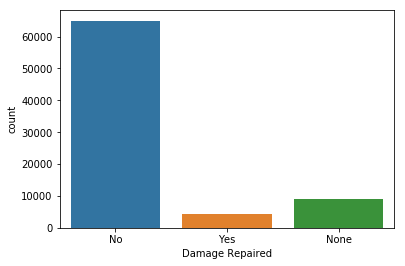

In [19]:
# for category column x15
fulldata['x15'].fillna(value = 'None',inplace = True)
sns.countplot(fulldata['x15'])
plt.xlabel('Damage Repaired')

since majority of the data is falls in 'No', we can assume that 'None' can be replaced by 'No' as well

In [20]:
fulldata['x15'] = fulldata['x15'].replace(to_replace = 'None',value = 'No')

Text(0.5,0,'Type of Fuel')

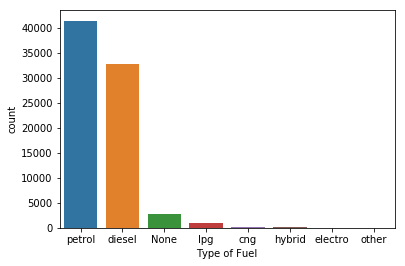

In [21]:
# for category column x13
fulldata['x13'].fillna(value = 'None',inplace = True)
sns.countplot(fulldata['x13'])
plt.xlabel('Type of Fuel')

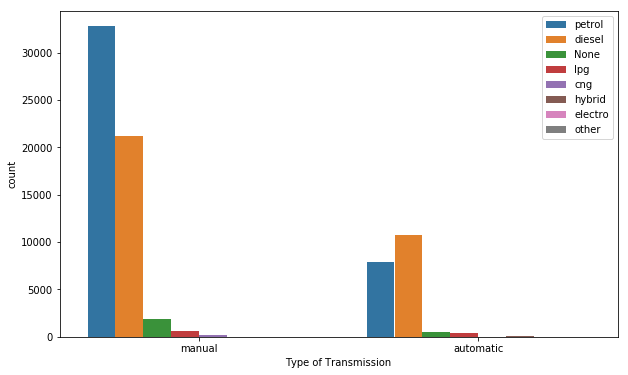

In [22]:
plt.figure(figsize = (10,6))
sns.countplot(fulldata['x8'],hue = 'x13',data = fulldata)
plt.xlabel('Type of Transmission')
plt.legend(loc = 'upper right')

Let's keep it as 'None'

In [23]:
#check later
#fulldata['x13_new'] = (np.where(fulldata['x8'] == 'manual')) and (np.where(fulldata['x13'] == 'None')), 'petrol','')
#print (fulldata.head())

Text(0.5,0,'Type of Car')

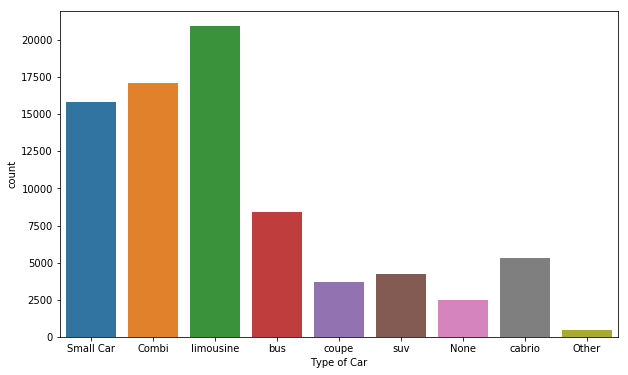

In [24]:
# for category column x6
plt.figure(figsize = (10,6))
fulldata['x6'].fillna(value = 'None',inplace = True)
sns.countplot(fulldata['x6'])
plt.xlabel('Type of Car')

Let's keep it as 'None'

Text(0.5,0,'Type of Transmission')

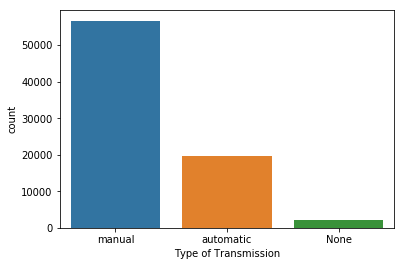

In [25]:
# for category column x8
fulldata['x8'].fillna(value = 'None',inplace = True)
sns.countplot(fulldata['x8'])
plt.xlabel('Type of Transmission')

In [26]:
fulldata['New_x8'] = fulldata['x8'].replace(to_replace = 'None',value = 'manual')

we have replaced the missing values. Lets check the categorical columns once before we do the encoding.

## Encoding

In [27]:
fulldata[cat_cols].head()

,x4,x5,x6,x8,x12,x13,x14,x15
0,private,offer,Small Car,manual,7,petrol,subaru,No
1,private,offer,Combi,manual,5,diesel,volkswagen,No
2,private,offer,limousine,automatic,2,diesel,mercedes_benz,No
3,private,offer,limousine,manual,9,diesel,alfa_romeo,No
4,private,offer,Combi,manual,3,petrol,audi,No


In [28]:
for col in cat_cols:
    print(col,':',fulldata[col].unique(),'\n')

x4 : ['private'] 

x5 : ['offer'] 

x6 : ['Small Car' 'Combi' 'limousine' 'bus' 'coupe' 'suv' 'None' 'cabrio'
 'Other'] 

x8 : ['manual' 'automatic' 'None'] 

x12 : [ 7  5  2  9  3  8 12 10  1  6  0  4 11] 

x13 : ['petrol' 'diesel' 'None' 'lpg' 'cng' 'hybrid' 'electro' 'other'] 

x14 : ['subaru' 'volkswagen' 'mercedes_benz' 'alfa_romeo' 'audi' 'mazda' 'bmw'
 'land_rover' 'opel' 'smart' 'renault' 'fiat' 'toyota' 'ford' 'porsche'
 'nissan' 'mini' 'peugeot' 'hyundai' 'chrysler' 'chevrolet' 'mitsubishi'
 'seat' 'suzuki' 'kia' 'citroen' 'honda' 'jaguar' 'dacia' 'skoda'
 'daihatsu' 'volvo' 'jeep' 'rover' 'saab' 'daewoo' 'lada' 'lancia'] 

x15 : ['No' 'Yes'] 



Before we do the encoding, we still need to clean some of the categorical columns.

label encoding = x15,x12,
ohe = x6,x8,x13
drop cols = x14,x4,x5

In [29]:
#label encoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
fulldata['x15_new'] = label.fit_transform(fulldata['x15'])
fulldata['x12_new'] = fulldata['x12']

In [30]:
#one hot encoding
x6_ohe = pd.get_dummies(fulldata['x6'], prefix='x6', prefix_sep='_')
x8_ohe = pd.get_dummies(fulldata['x8'], prefix='x8', prefix_sep='_')

In [31]:
#ohe for x13
fulldata['x13_new'] = fulldata['x13'].replace(to_replace = ('None','lpg','cng','hybrid','electro','other'),value = 'others')

x13_ohe = pd.get_dummies(fulldata['x13_new'],prefix='x13', prefix_sep='_')

In [32]:
fulldata = pd.concat([fulldata,x6_ohe,x8_ohe,x13_ohe],axis = 1)

Drop the categorical columns and consolidate to keep the numerical values as a new dataset.

In [33]:
#removing category cols
new_fulldata = fulldata.drop(fulldata[cat_cols],axis = 1)

In [34]:
#removing string cols
new_fulldata = new_fulldata.drop(new_fulldata[string_cols],axis = 1)

In [35]:
#removing date columns
new_fulldata = new_fulldata.drop(new_fulldata[date_cols],axis = 1)

In [36]:
#remove any non-numerical columns
new_fulldata = new_fulldata.drop(new_fulldata[['New_x8','x13_new']],axis = 1)

In [37]:
new_fulldata.head()

,x1,y,x7,x9,x11,x17,x18,Type,x15_new,x12_new,...,x6_cabrio,x6_coupe,x6_limousine,x6_suv,x8_None,x8_automatic,x8_manual,x13_diesel,x13_others,x13_petrol
0,1,3850.0,2004,94,50000.0,0,34474,Train,0,7,...,0,0,0,0,0,0,1,0,0,1
1,2,5999.0,2007,140,150000.0,0,50765,Train,0,5,...,0,0,0,0,0,0,1,1,0,0
2,3,5990.0,2007,150,150000.0,0,90475,Train,0,2,...,0,0,1,0,0,1,0,1,0,0
3,4,4000.0,2005,150,150000.0,0,40699,Train,0,9,...,0,0,1,0,0,0,1,1,0,0
4,5,12950.0,2005,200,125000.0,0,84347,Train,0,3,...,0,0,0,0,0,0,1,0,0,1


## Configure Train & Test data

In [38]:
traindata = new_fulldata[new_fulldata['Type']=='Train']


In [66]:
testdata = new_fulldata[new_fulldata['Type']=='Test']

#### split train data to build the model

In [39]:
X = traindata.drop(['x1','Type','y'],axis = 1)
y = traindata['y']

print(X.shape)
print(y.shape)

(58857, 22)
(58857,)


In [40]:
#split train & valid
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size = 0.33,random_state = 101)

### Build Models

In [41]:
# List of models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

#for stacking
#from vecstack import stacking

# Metrics Evaluation
from sklearn import metrics
from sklearn.metrics import mean_squared_error

#cross validation
from sklearn.model_selection import cross_val_score

#### model train and fit

In [42]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LSR', Lasso()))
models.append(('RD', Ridge()))
#models.append(('SVR', SVR()))
models.append(('KNR', KNeighborsRegressor()))
models.append(('DTR', DecisionTreeRegressor()))
models.append(('ETR', ExtraTreesRegressor()))
models.append(('RFR', RandomForestRegressor()))
models.append(('ADA', AdaBoostRegressor()))
models.append(('GRA', GradientBoostingRegressor()))
models.append(('XG', XGBRegressor()))
models.append(('LGBM', LGBMRegressor()))

# evaluate each model in turn
for name, model in models:
    model.fit(X_train,y_train)
    y_predict_1 = model.predict(X_valid)
    y_predict_train_1 = model.predict(X_train)
    #MSE_CV = np.mean(-cross_val_score(model,X_train,y_train,cv = 10,scoring = 'neg_mean_squared_error'))
    #RMSE_CV = np.sqrt(MSE_CV)
    #RMSE = np.sqrt(metrics.mean_squared_error(y_valid,y_predict_1))
    MAPE_test = np.mean(np.abs((y_valid - y_predict_1) / y_valid)) * 100
    MAPE_train = np.mean(np.abs((y_train - y_predict_train_1) / y_train)) * 100
    print(name,':','\n','Mean Absolute Percentage Error for Train data:',MAPE_train,'\n','Mean Absolute Percentage Error for Valid data:',MAPE_test)

LR : 
 Mean Absolute Percentage Error for Train data: 63.45791186083609 
 Mean Absolute Percentage Error for Valid data: 63.55953713959842
LSR : 
 Mean Absolute Percentage Error for Train data: 63.418024098771454 
 Mean Absolute Percentage Error for Valid data: 63.51935113253459
RD : 
 Mean Absolute Percentage Error for Train data: 63.45512546690122 
 Mean Absolute Percentage Error for Valid data: 63.55683855758044
KNR : 
 Mean Absolute Percentage Error for Train data: 55.615854951116084 
 Mean Absolute Percentage Error for Valid data: 69.80949826066521
DTR : 
 Mean Absolute Percentage Error for Train data: 0.13440674454426496 
 Mean Absolute Percentage Error for Valid data: 36.56573664557717
ETR : 
 Mean Absolute Percentage Error for Train data: 0.13577094693831415 
 Mean Absolute Percentage Error for Valid data: 30.769935380384645
RFR : 
 Mean Absolute Percentage Error for Train data: 12.053903703529803 
 Mean Absolute Percentage Error for Valid data: 30.20064157020664
ADA : 
 Mean A

### Performance Tuning

#### 1. Scaling

In [43]:
X_columns = X.columns


from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
XS = scaler.fit_transform(X)

XS = pd.DataFrame(data = XS, columns = X_columns)

XS_train,XS_valid,y_train,y_valid = train_test_split(XS,y,test_size = 0.33,random_state = 101)
print(XS_train.shape)
print(XS_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(39434, 22)
(19423, 22)
(39434,)
(19423,)


In [44]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LSR', Lasso()))
models.append(('RD', Ridge()))
#models.append(('SVR', SVR()))
models.append(('KNR', KNeighborsRegressor()))
models.append(('DTR', DecisionTreeRegressor()))
models.append(('ETR', ExtraTreesRegressor()))
models.append(('RFR', RandomForestRegressor()))
models.append(('ADA', AdaBoostRegressor()))
models.append(('GRA', GradientBoostingRegressor()))
models.append(('XG', XGBRegressor()))
models.append(('LGBM', LGBMRegressor()))

# evaluate each model in turn
for name, model in models:
    model.fit(XS_train,y_train)
    y_predict_2 = model.predict(XS_valid)
    y_predict_train_2 = model.predict(X_train)
    MAPE_test_2 = np.mean(np.abs((y_valid - y_predict_2) / y_valid)) * 100
    MAPE_train_2 = np.mean(np.abs((y_train - y_predict_train_2) / y_train)) * 100
    print(name,':','\n','Mean Absolute Percentage Error for Train data:', MAPE_train_2,'\n','Mean Absolute Percentage Error for Valid data:',MAPE_test_2)

LR : 
 Mean Absolute Percentage Error for Train data: 334783420556186.1 
 Mean Absolute Percentage Error for Valid data: 63.58085724690593
LSR : 
 Mean Absolute Percentage Error for Train data: 3773602.2489779033 
 Mean Absolute Percentage Error for Valid data: 63.54126933687577
RD : 
 Mean Absolute Percentage Error for Train data: 3775183.157477161 
 Mean Absolute Percentage Error for Valid data: 63.5588619310356
KNR : 
 Mean Absolute Percentage Error for Train data: 111.04606879544335 
 Mean Absolute Percentage Error for Valid data: 37.33578017396839
DTR : 
 Mean Absolute Percentage Error for Train data: 528.0821414798872 
 Mean Absolute Percentage Error for Valid data: 36.530712035988856
ETR : 
 Mean Absolute Percentage Error for Train data: 335.78685635342 
 Mean Absolute Percentage Error for Valid data: 30.776591022059435
RFR : 
 Mean Absolute Percentage Error for Train data: 337.2586337541979 
 Mean Absolute Percentage Error for Valid data: 30.278728023182417
ADA : 
 Mean Absolut

After scaling, some of the models performance went high and some of them went down. We further explore the features to select the important features.

### Feature Selection

#### 1. SelectKBest

In [45]:
#Import Libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

for n in range(0,len(X_columns)):
    kbest = SelectKBest(score_func = f_regression, k = 5)
    kb = kbest.fit(X,y)
    print(X_columns[n],'-',kb.scores_[n])

D:\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
D:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
D:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
D:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


x7 - 33546.972704995635
x9 - 2420.3206137494976
x11 - 14151.808973175048
x17 - nan
x18 - 460.50031858786537
x15_new - 818.3321175972357
x12_new - 57.34716301072407
x6_Combi - 7.719111864533086
x6_None - 424.2578271658562
x6_Other - 27.384276400490847
x6_Small Car - 3932.690603401053
x6_bus - 2.854709948648136
x6_cabrio - 762.3056681452518
x6_coupe - 1084.4535177589833
x6_limousine - 135.4819203824565
x6_suv - 2570.8648651574626
x8_None - 366.66791510616895
x8_automatic - 7317.687741818425
x8_manual - 5458.95537771647
x13_diesel - 2114.6810994635084
x13_others - 408.65166431980725
x13_petrol - 1301.782056187793


#### 2. Feature Importance Method

         importance
feature            
x7            0.409
x9            0.367
x11           0.060
x18           0.054
x12_new       0.025


<Figure size 720x432 with 0 Axes>

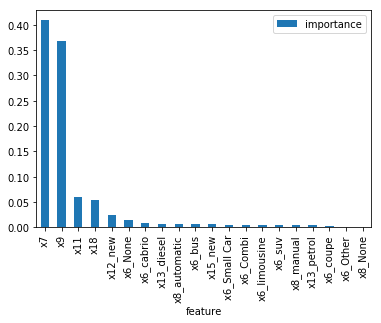

In [46]:
rfr = RandomForestRegressor()
rfr.fit(X,y)
importances = pd.DataFrame({'feature':X_columns,'importance':np.round(rfr.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
 
print(importances.head())

plt.figure(figsize=(10,6))
importances.head(20).plot.bar()

#### 3. Recursive Feture Elimination

In [47]:
from sklearn.feature_selection import RFE

rfr = RandomForestRegressor()
rfe = RFE(rfr,15)
rfe = rfe.fit(X,y)
Feature_Selection = pd.DataFrame({'feature':X_columns,'Feature Selection':np.round(rfe.ranking_,3)})
Feature_Selection = Feature_Selection.sort_values('Feature Selection',ascending=True).set_index('feature')
 
print(Feature_Selection.head(25))

              Feature Selection
feature                        
x7                            1
x9                            1
x11                           1
x13_diesel                    1
x18                           1
x15_new                       1
x12_new                       1
x6_Combi                      1
x6_None                       1
x8_manual                     1
x8_automatic                  1
x6_bus                        1
x6_cabrio                     1
x6_suv                        1
x6_limousine                  1
x6_Small Car                  2
x13_petrol                    3
x6_coupe                      4
x13_others                    5
x8_None                       6
x6_Other                      7
x17                           8


Based on the above feature selection methods, we will choose the follwing columns. so our new XF will be x7,x11,x8_automatic,x8_manual,x6_suv,x6_coupe,x6_suv,x6_small,x9,x18,x12_new

In [48]:
XF = X[['x7','x11','x8_automatic','x8_manual','x6_Small Car','x6_coupe','x6_suv','x9','x18','x12_new']]
XF_train,XF_valid,y_train,y_valid = train_test_split(XF,y,test_size = 0.33,random_state = 101)
print(XF_train.shape)
print(XF_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(39434, 10)
(19423, 10)
(39434,)
(19423,)


In [49]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LSR', Lasso()))
models.append(('RD', Ridge()))
#models.append(('SVR', SVR()))
models.append(('KNR', KNeighborsRegressor()))
models.append(('DTR', DecisionTreeRegressor()))
models.append(('ETR', ExtraTreesRegressor()))
models.append(('RFR', RandomForestRegressor()))
models.append(('ADA', AdaBoostRegressor()))
models.append(('GRA', GradientBoostingRegressor()))
models.append(('XG', XGBRegressor()))
models.append(('LGBM', LGBMRegressor()))

# evaluate each model in turn
for name, model in models:
    model.fit(XF_train,y_train)
    y_predict_3 = model.predict(XF_valid)
    MAPE_3 = np.mean(np.abs((y_valid - y_predict_3) / y_valid)) * 100
    print(name,':','\n','Mean Absolute Percentage Error:',MAPE_3)

LR : 
 Mean Absolute Percentage Error: 65.79993270730597
LSR : 
 Mean Absolute Percentage Error: 65.77092189991464
RD : 
 Mean Absolute Percentage Error: 65.79740311738212
KNR : 
 Mean Absolute Percentage Error: 69.84890669858044
DTR : 
 Mean Absolute Percentage Error: 40.42156007750877
ETR : 
 Mean Absolute Percentage Error: 33.75838722857059
RFR : 
 Mean Absolute Percentage Error: 33.1673156063965
ADA : 
 Mean Absolute Percentage Error: 123.88970497772563
GRA : 
 Mean Absolute Percentage Error: 34.257205188274284
XG : 
 Mean Absolute Percentage Error: 34.123562194861776
LGBM : 
 Mean Absolute Percentage Error: 32.43217765215572


Our select features didn't give any improvements. So we gonna stick to the initial columns.

### Model Hyperparameter Tuning

Lets discard some of the weak predictor models and keep the top 5 models. The selected models will be 'LGBM','XG','GRA','RFR','DTR'

#### 1. RFR Tuning

In [50]:
#from sklearn.model_selection import GridSearchCV

#rfr = RandomForestRegressor()
#param_grid = { 
#    'n_estimators': [20,50,100],
 #   'max_depth' : [4,5,6,7,8,10,12]
#}
#CV_rfr = GridSearchCV(estimator=rfr, param_grid=param_grid, cv= 10)
#CV_rfr.fit(X_train, y_train)

In [51]:
#CV_rfr.best_params_

In [52]:
rfr = RandomForestRegressor(max_depth = 12, n_estimators = 100,random_state = 101)
rfr.fit(X_train,y_train)
y_predict_rfr = rfr.predict(X_valid)
MAPE_rfr = np.mean(np.abs((y_valid - y_predict_rfr) / y_valid)) * 100
print('Mean Absolute Percentage Error for Random Forest:',MAPE_rfr)

Mean Absolute Percentage Error for Random Forest: 29.97652372674266


In [53]:
from sklearn.model_selection import GridSearchCV
LGBM = LGBMRegressor()
param_grid = { 
    'n_estimators': [25,50,100],
   'learning_rate' : [0.01,0.05,0.1,0.15,0.2],
}
CV_LGBM = GridSearchCV(estimator=LGBM, param_grid=param_grid, cv= 10)
CV_LGBM.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       learning_rate=0.1, max_depth=-1, min_child_samples=20,
       min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
       n_jobs=-1, num_leaves=31, objective=None, random_state=None,
       reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
       subsample_for_bin=200000, subsample_freq=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [25, 50, 100], 'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [63]:
CV_LGBM.best_params_

{'learning_rate': 0.2, 'n_estimators': 100}

### Result

In [67]:
testdata.columns

Index(['x1', 'y', 'x7', 'x9', 'x11', 'x17', 'x18', 'Type', 'x15_new',
       'x12_new', 'x6_Combi', 'x6_None', 'x6_Other', 'x6_Small Car', 'x6_bus',
       'x6_cabrio', 'x6_coupe', 'x6_limousine', 'x6_suv', 'x8_None',
       'x8_automatic', 'x8_manual', 'x13_diesel', 'x13_others', 'x13_petrol'],
      dtype='object')

In [68]:
testdata = testdata.drop(['y','Type'],axis = 1)

In [72]:
ID = testdata[['x1']]
num = testdata.drop(['x1'],axis = 1)

In [73]:
testdata.columns

Index(['x1', 'x7', 'x9', 'x11', 'x17', 'x18', 'x15_new', 'x12_new', 'x6_Combi',
       'x6_None', 'x6_Other', 'x6_Small Car', 'x6_bus', 'x6_cabrio',
       'x6_coupe', 'x6_limousine', 'x6_suv', 'x8_None', 'x8_automatic',
       'x8_manual', 'x13_diesel', 'x13_others', 'x13_petrol'],
      dtype='object')

### Final Output

Using the tuned hyperparameters

In [74]:
LGBM = LGBMRegressor(learning_rate = 0.2, n_estimators =100)
#LGBM.fit(X_train,y_train)
num['y_predict'] = CV_LGBM.predict(num)

In [75]:
results = pd.concat([ID,num],axis = 1)

In [76]:
results.to_csv('Hackathon_Karthik_Results_06082018.csv')

In [77]:
solution = pd.read_csv('solution.csv')
solution.head()

,x1,y
0,60001,9800
1,60002,2500
2,60003,17999
3,60004,7550
4,60005,2500


In [78]:
MAPE = np.mean(np.abs((solution['y'] - num['y_predict']) / solution['y'])) * 100
print('Mean Absolute Percentage Error for LGBM:',MAPE)

Mean Absolute Percentage Error for LGBM: 29.050809852943395
